In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

IMG_SIZE = 192

# Do not run

In [2]:
DATADIR = "C:/Users/antho/RNA/Kaggle/Human-protein-classification"

blue


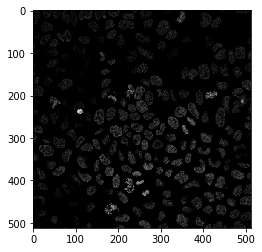

In [3]:
path = os.path.join(DATADIR, "train")
for img in os.listdir(path):
    print(img[37:-4])
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

In [4]:
print(img_array.shape)

(512, 512)


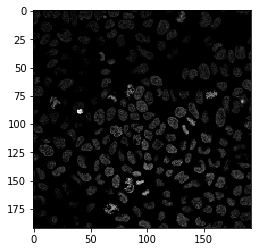

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [25]:
training_data = []

def create_training_data():
    path = os.path.join(DATADIR, "train")
    for img in os.listdir(path):
        Id = img[:36]
        color = img[37:-4]
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([Id, new_array, color])
        
create_training_data()    

In [26]:
print(len(training_data))

124288


In [27]:
print(training_data[0])

['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0', array([[ 3, 14, 11, ...,  9, 10,  0],
       [12, 10,  8, ..., 10,  3,  0],
       [12,  5,  9, ...,  4,  1,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 3,  1,  1, ...,  0,  0,  0],
       [ 4,  3,  3, ...,  0,  0,  0]], dtype=uint8), 'blue']


In [32]:
for sample in training_data[:10]:
    print(sample[2])

blue
green
red
yellow
blue
green
red
yellow
blue
green


In [31]:
train_green = []
train_blue = []
train_red = []
train_yellow = []

In [33]:
for sample in training_data:
    if sample[2] == 'green':
        train_green.append(sample)
    elif sample[2] == 'blue':
        train_blue.append(sample)
    elif sample[2] == 'red':
        train_red.append(sample)
    elif sample[2] == 'yellow':
        train_yellow.append(sample)

In [34]:
print(len(train_green))
print(len(train_blue))
print(len(train_red))
print(len(train_yellow))

31072
31072
31072
31072


In [37]:
train_green = np.array(train_green)
train_blue = np.array(train_blue)
train_red = np.array(train_red)
train_yellow = np.array(train_yellow)

In [38]:
# Save the np.array's so we don't reload all the images every time
np.save('green.npy', train_green)
np.save('blue.npy', train_blue)
np.save('red.npy', train_red)
np.save('yellow.npy', train_yellow)

Now data is stored in numpy array saved on the computer so we don't need to rerun all the cells below and just need to reload these numpy arrays.

This way we can load the numpy array in 1 min instead of loading all the images and shape them as arrays (more than 20min)

# Run from here

In [45]:
green = np.load('green.npy', allow_pickle=True)
blue = np.load('blue.npy', allow_pickle=True)
red = np.load('red.npy', allow_pickle=True)
yellow = np.load('yellow.npy', allow_pickle=True)

MemoryError: 

In [ ]:
import pandas as pd

df_green = pd.DataFrame(data=green, columns=['Id', 'img', 'color'])
df_blue = pd.DataFrame(data=blue, columns=['Id', 'img', 'color'])
df_red = pd.DataFrame(data=red, columns=['Id', 'img', 'color'])
df_yellow = pd.DataFrame(data=yellow, columns=['Id', 'img', 'color'])

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

In [ ]:
df_merge_green = pd.merge(df_green, df_train, on='Id')
df_merge_blue = pd.merge(df_blue, df_train, on='Id')
df_merge_red = pd.merge(df_red, df_train, on='Id')
df_merge_yellow = pd.merge(df_yellow, df_train, on='Id')

In [ ]:
df_merge_green.head()

In [ ]:
len(green) == len(df_merge_green)

In [ ]:
df_merge_green['Target'].describe()

In [ ]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row



for key in label_names.keys():
        df_merge_green[label_names[key]] = 0
        df_merge_blue[label_names[key]] = 0
        df_merge_red[label_names[key]] = 0
        df_merge_yellow[label_names[key]] = 0

df_merge_green = df_merge_green.apply(fill_targets, axis=1)
df_merge_blue = df_merge_blue.apply(fill_targets, axis=1)
df_merge_red = df_merge_red.apply(fill_targets, axis=1)
df_merge_yellow = df_merge_yellow.apply(fill_targets, axis=1)
df_merge_green.head()

In [ ]:
import seaborn as sns

target_counts = df_merge_green.drop(["Id", "Target", "color", "img"], axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [ ]:
np.concatenate((df_merge_green['img'][0].reshape(256,256,1), 
                df_merge_blue['img'][0].reshape(256,256,1),
                df_merge_red['img'][0].reshape(256,256,1),
                df_merge_yellow['img'][0].reshape(256,256,1)),axis=2)

df_train = []
for i in range(len(df_merge_green)):
    df_train.append(np.concatenate((df_merge_green['img'][i].reshape(256,256,1), 
                df_merge_blue['img'][i].reshape(256,256,1),
                df_merge_red['img'][i].reshape(256,256,1),
                df_merge_yellow['img'][i].reshape(256,256,1)),axis=2))

In [ ]:
import gc

del green
del red
del blue
del yellow

del df_green
del df_blue
del df_red
del df_yellow

del df_merge_blue
del df_merge_red
del df_merge_yellow

gc.collect()

df_train = np.array(df_train)
df_train = df_train.astype('float16')

In [ ]:
del df_merge_green['img']
gc.collect()

df_train.shape

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adadelta, SGD
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras import backend as K
from tensorflow.keras.applications import InceptionResNetV2

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

    
input_shape = (IMG_SIZE, IMG_SIZE, 4)
num_classes = 28

sgd = SGD(lr=0.01)

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=binary_crossentropy,
             optimizer=sgd,
             metrics=[f1])

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

y = []

for target in df_merge_green['Target']:
    temp = np.array([0]*28)
    for index in target:
        temp[index]=1
    y.append(temp)

In [ ]:
# X = []
# for img in df_merge_green['img']:
#     X.append(img)
    
# X = np.array([X])

In [ ]:
df_train.shape

In [ ]:
X_train = df_train[:-int(len(df_train)*0.2)]
X_val = df_train[-int(len(df_train)*0.2):]

y_train = y[:-int(len(df_train)*0.2)]
y_val = y[-int(len(df_train)*0.2):]

# X_train = df_train[:5000]
# X_val = df_train[5000:6000]

# y_train = y[:5000]
# y_val = y[5000:6000]

sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

len(X_train) == len(y_train)

In [ ]:
y_train = np.array([y_train])
y_val = np.array([y_val])

In [ ]:
y_train = y_train.reshape(-1,28)
y_val = y_val.reshape(-1,28)
y_train.shape

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(DATADIR, monitor='val_f1', verbose=0, save_best_only=True, save_weights_only=False, mode='min', period=1)

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
#                     sample_weight=sample_weight,
                    validation_data=(X_val, y_val),
                   callbacks=[checkpoint])

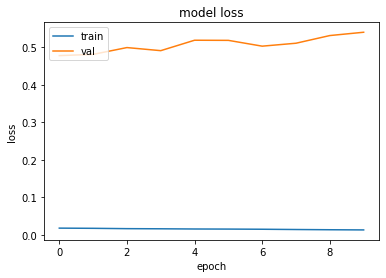

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

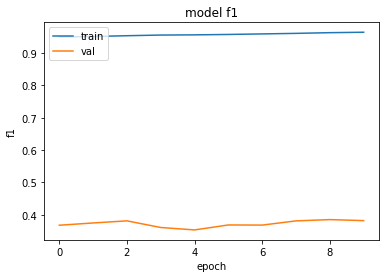

In [32]:
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Do not run

In [27]:
del df_train
del X_train
del X_val
del y_train
del y_val

gc.collect()

test_data = []

def create_test_data():
    path = os.path.join(DATADIR, "test")
    for img in os.listdir(path):
        Id = img[:36]
        color = img[37:-4]
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        test_data.append([Id, new_array, color])
     
    
create_test_data()
    
green = []
blue = []
red = []
yellow = []
    
for sample in test_data:
    if sample[2] == 'green':
        green.append(sample)
    elif sample[2] == 'blue':
        blue.append(sample)
    elif sample[2] == 'red':
        red.append(sample)
    elif sample[2] == 'yellow':
        yellow.append(sample)
    
df_test_green = pd.DataFrame(data=green, columns=['Id', 'img', 'color'])
df_test_blue = pd.DataFrame(data=blue, columns=['Id', 'img', 'color'])
df_test_red = pd.DataFrame(data=red, columns=['Id', 'img', 'color'])
df_test_yellow = pd.DataFrame(data=yellow, columns=['Id', 'img', 'color'])

submit = pd.read_csv('sample_submission.csv')

df_test = []
for i in range(len(df_test_green)):
    df_test.append(np.concatenate((df_test_green['img'][i].reshape(256,256,1), 
                df_test_blue['img'][i].reshape(256,256,1),
                df_test_red['img'][i].reshape(256,256,1),
                df_test_yellow['img'][i].reshape(256,256,1)),axis=2))
    
del df_test_blue
del df_test_green
del df_test_red
del df_test_yellow
del test_data

gc.collect()

5590

In [28]:
df_test = np.array(df_test)

In [32]:
np.save('test.npy', df_test)

# Run from here

In [33]:
del df_train
del X_train
del X_val
del y_train
del y_val
gc.collect()

5941

In [34]:
df_test = np.load('test.npy')
df_test = df_test.astype('float32')

In [35]:
predictions = model.predict(df_test)

In [1]:
submit = pd.read_csv('sample_submission.csv')
submit['Predicted'] = submit['Predicted'].astype('str')

for row in submit.index:
    pred = []
    for i in range(len(predictions[row])):
        if predictions[row][i] >= 0.3:
            pred.append(str(i))
    submit.at[row, 'Predicted'] = ' '.join(pred)
   

print(submit.head())
submit.to_csv('submission.csv', index=False)

NameError: name 'pd' is not defined

In [39]:
print(len(submit[submit['Predicted'] == '']))
print(len(submit))

3271
11702
